In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from matplotlib.pyplot import figure
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
from ydata_profiling import ProfileReport

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('Train Dataset.csv')
test_df = pd.read_csv('Test Dataset.csv')

In [4]:
test = pd.read_csv('Test.csv')

In [5]:
train_df.head()

Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1

In [9]:
def rename_col(table_name):
    table_name.rename(columns={
    'Id': 'patient_id',
    'Age': 'patient_age',
    'Sex': 'patient_sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol_level',
    'fbs': 'fasting_blood_sugar_result',
    'restecg': 'resting_ecg_results',
    'thalach': 'maximum_heart_rate_achieved',
    'exang': 'exercise_induced_angina_result',
    'oldpeak': 'st_depression_induced_by_exercise',
    'slope': 'slope_of_peak_exercise_st_segment',
    'ca': 'number_of_major_vessels',
    'thal': 'thalassemia_diagnosis'}, inplace = True)

rename_col(train_df)
# rename_col(test_df)


In [10]:
def rename_col(table_name):
    table_name.rename(columns={
    'id': 'patient_id',
    'age': 'patient_age',
    'sex': 'patient_sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol_level',
    'fbs': 'fasting_blood_sugar_result',
    'restecg': 'resting_ecg_results',
    'thalach': 'maximum_heart_rate_achieved',
    'exang': 'exercise_induced_angina_result',
    'oldpeak': 'st_depression_induced_by_exercise',
    'slope': 'slope_of_peak_exercise_st_segment',
    'ca': 'number_of_major_vessels',
    'thal': 'thalassemia_diagnosis'}, inplace = True)

rename_col(test_df)

In [8]:
train_df.head()

patient_id  patient_age  patient_sex  chest_pain_type  \
0       16167           33            0                1   
1       11275           53            1                2   
2       13251           37            1                2   
3       19921           75            0                0   
4       11293           35            1                2   

   resting_blood_pressure  serum_cholesterol_level  \
0                     158                      205   
1                     198                      154   
2                     101                      202   
3                     113                      306   
4                     139                      419   

   fasting_blood_sugar_result  resting_ecg_results  \
0                           1                    0   
1                           0                    1   
2                           1                    0   
3                           1                    2   
4                           1                    1   

   maximum_heart_rate_achieved  exercise_induced_angina_result  \
0                          154                               0   
1                          104                               0   
2                          155                               0   
3                           88                               1   
4                          166                               1   

   st_depression_induced_by_exercise  slope_of_peak_exercise_st_segment  \
0                                1.5                                  1   
1                                0.8                                  2   
2                                2.1                                  1   
3                                4.9                                  0   
4                                0.9                                  2   

   number_of_major_vessels  thalassemia_diagnosis  target  
0                        4                      1       1  
1                        1                      0       0  
2                        3                      1       1  
3                        2                      2       1  
4                        4                      0       1

In [9]:
train_df.columns

Index(['patient_id', 'patient_age', 'patient_sex', 'chest_pain_type',
       'resting_blood_pressure', 'serum_cholesterol_level',
       'fasting_blood_sugar_result', 'resting_ecg_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina_result',
       'st_depression_induced_by_exercise',
       'slope_of_peak_exercise_st_segment', 'number_of_major_vessels',
       'thalassemia_diagnosis', 'target'],
      dtype='object')

In [10]:
#profile = ProfileReport(train_df)
#profile

## Variable defination
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


## Important variable info
- Age(numeric): min; 29, max; 77
- Chest_pain_type(category)
- resting_blood_pressure(numeric): min(94), max(200)
- serum_cholesterol_level(numeric):min(126), max(564)
- fasting_blood_sugar_result(biary caterory)
- resting_ecg_results(0,1,2 values, category)
- maximum_heart_rate_achieved(numeric): min(71), max(202)
- exercise_induced_angina_result(binary, category)
- st_depression_induced_by_exercise(numeric): min(0), max(6.2)
- slope_of_peak_exercise_st_segment(0,1,2 values)
- number_of_major_vessels(0,1,2,3,4 values)
- thalassema_diagnosis(0,1,2,3 values)
- Target(binary): imbalanced 1(5751), 0(1336)

In [11]:
train_df.dtypes

patient_id                             int64
patient_age                            int64
patient_sex                            int64
chest_pain_type                        int64
resting_blood_pressure                 int64
serum_cholesterol_level                int64
fasting_blood_sugar_result             int64
resting_ecg_results                    int64
maximum_heart_rate_achieved            int64
exercise_induced_angina_result         int64
st_depression_induced_by_exercise    float64
slope_of_peak_exercise_st_segment      int64
number_of_major_vessels                int64
thalassemia_diagnosis                  int64
target                                 int64
dtype: object

>> All numeric! Here we go!

In [12]:
def plot_value_counts(column_name, df):
    # Calculate value counts
    value_counts = df[column_name].value_counts()

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Define colors
    colors = sns.color_palette("husl", len(value_counts))
    if all(isinstance(x, int) for x in value_counts.index):
        colors[value_counts.index.tolist().index(max(value_counts.index))] = 'red'
    else:
        longest_label = max(value_counts.index, key=len)
        colors[value_counts.index.tolist().index(longest_label)] = 'red'

    # Sort value counts
    sorted_value_counts = value_counts.sort_index()

    # Plot column chart on the first subplot
    sns.countplot(x=column_name, data=df, palette=colors, order=sorted_value_counts.index, ax=ax[0])
    ax[0].set_title(f'Distribution of {column_name.capitalize()}')
    ax[0].set_xlabel(column_name.capitalize())
    ax[0].set_ylabel('Frequency')
    ax[0].tick_params(axis='x', rotation=90)

    # Plot pie chart on the second subplot
    ax[1].pie(sorted_value_counts.values, labels=sorted_value_counts.index, explode=[0.1 if i == sorted_value_counts.idxmax() else 0 for i in sorted_value_counts.index], colors=colors, autopct='%1.1f%%')
    ax[1].set_title(f'Distribution of {column_name.capitalize()}')
    ax[1].axis('equal')

    # Layout so plots do not overlap
    plt.tight_layout()

    plt.show()

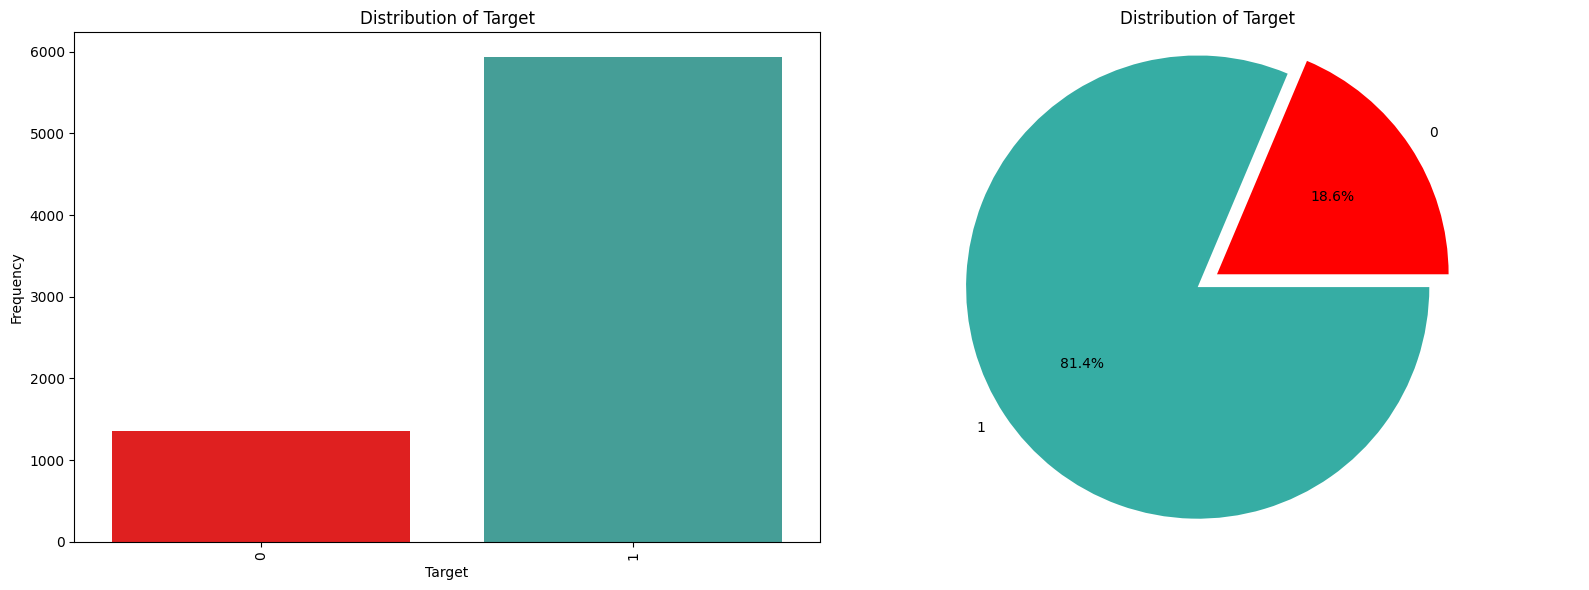

In [12]:
plot_value_counts('target', train_df)

>> Insight: Imbalanced data set as people with heart disease makes up 81.1% of the data! Use a classification method to address

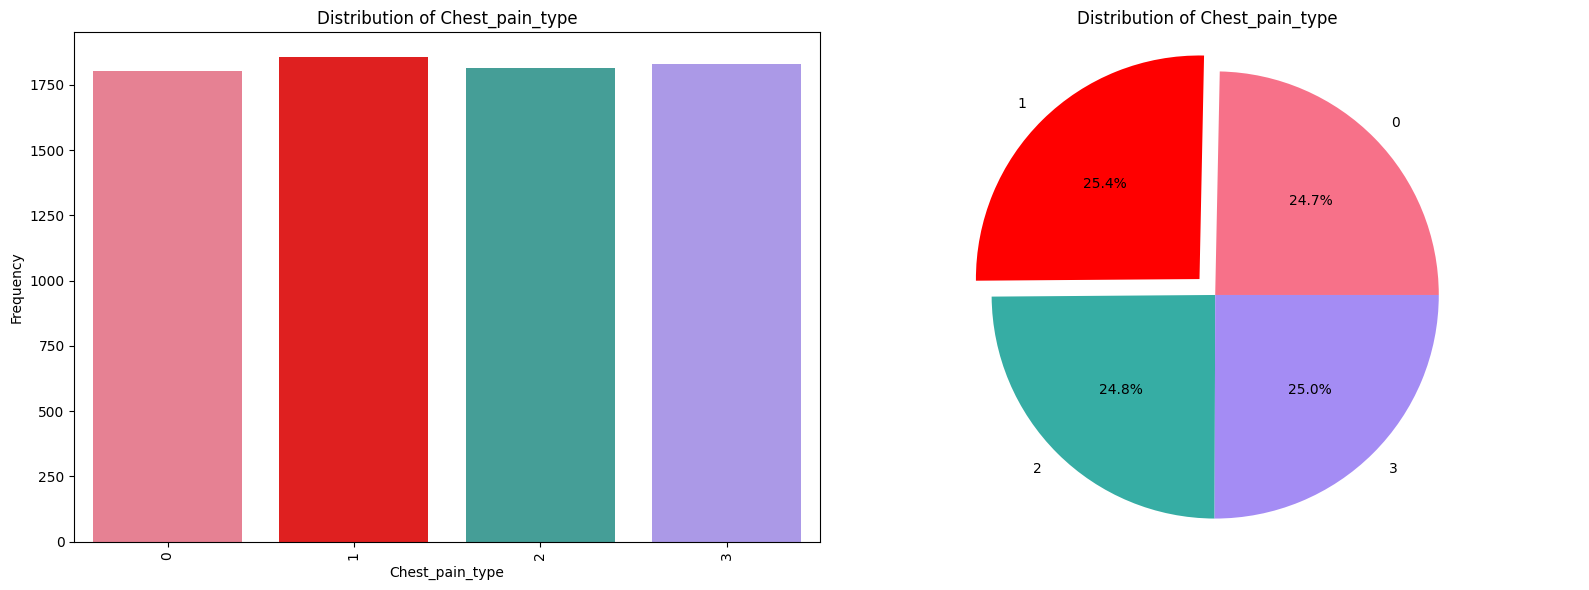

In [13]:
plot_value_counts('chest_pain_type', train_df)

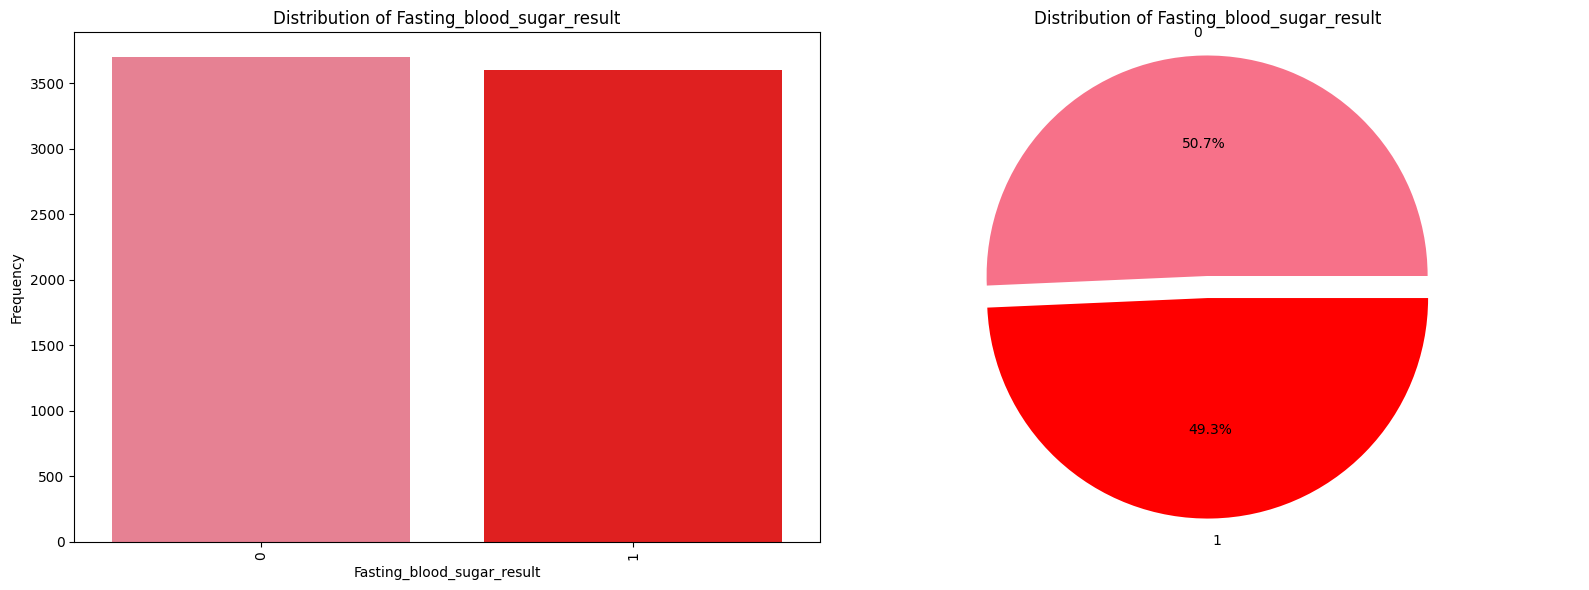

In [14]:
plot_value_counts('fasting_blood_sugar_result', train_df)

>> Insight: 49.9% percent has blood sugar after overnight fasting of up to 8 hours, a real risk of cardiovascular disease. One-hot0-encode this feature.

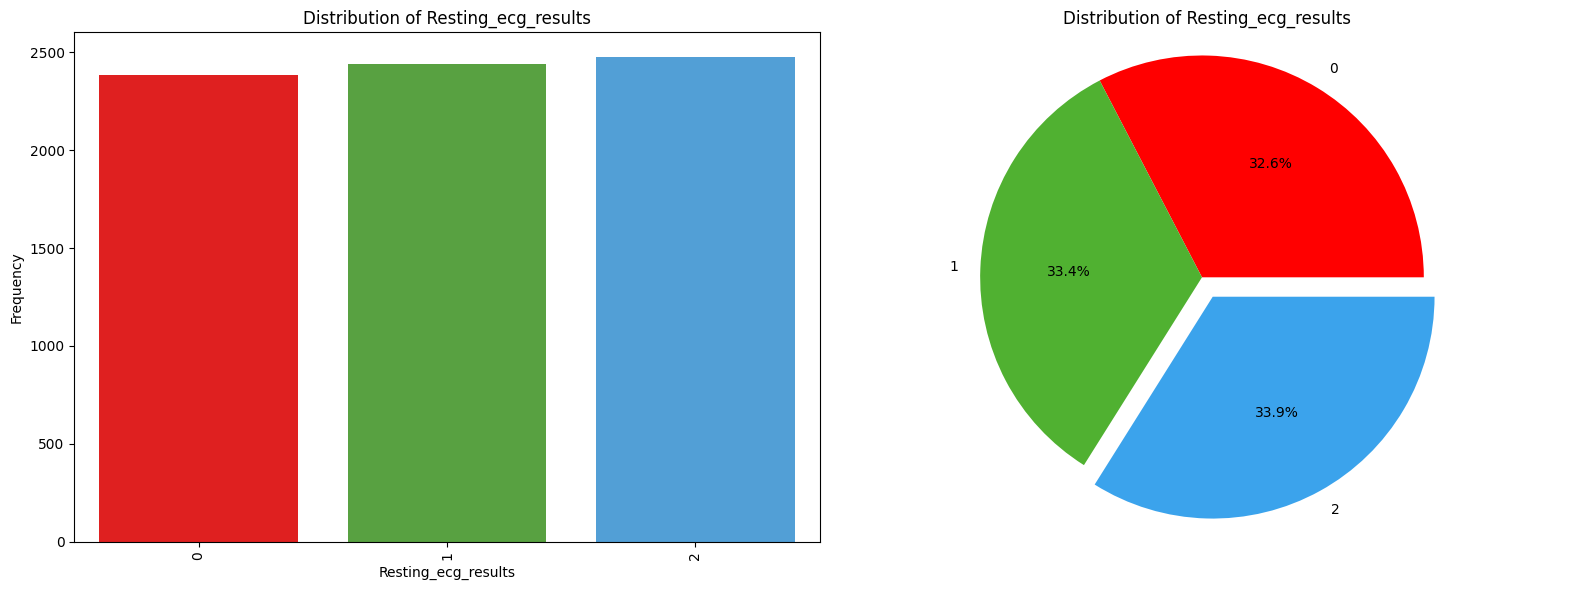

In [15]:
plot_value_counts('resting_ecg_results', train_df)

>> 33.9% has abnormal electrical activity of the heart when at rest and 33.3% has above normal activity. This two categories are real potential risks of cardiovascular disease/failure.

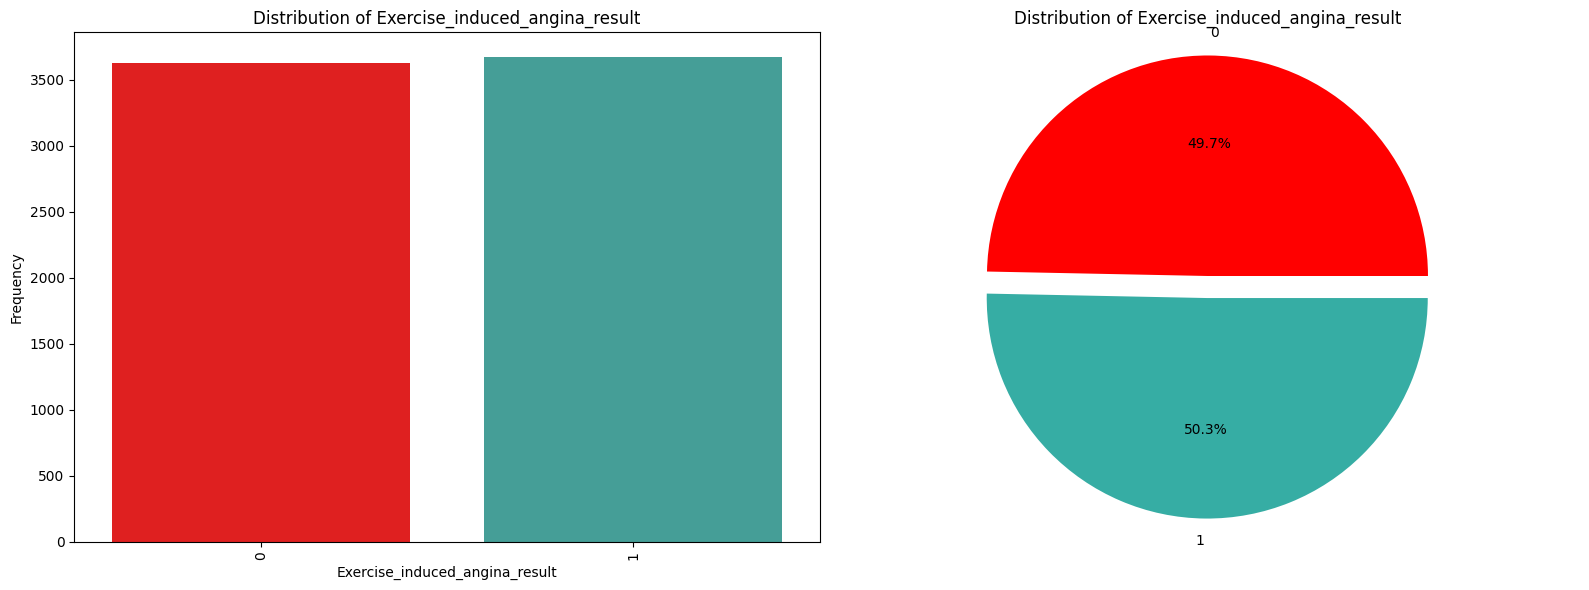

In [16]:
plot_value_counts('exercise_induced_angina_result', train_df)

>> All square, 50% has Angina pectoris(chest pain) which are induced during physical exertion which increases oxygen demand, exacerbating coronary artery disease and reduces blood flow to the heart muscle.

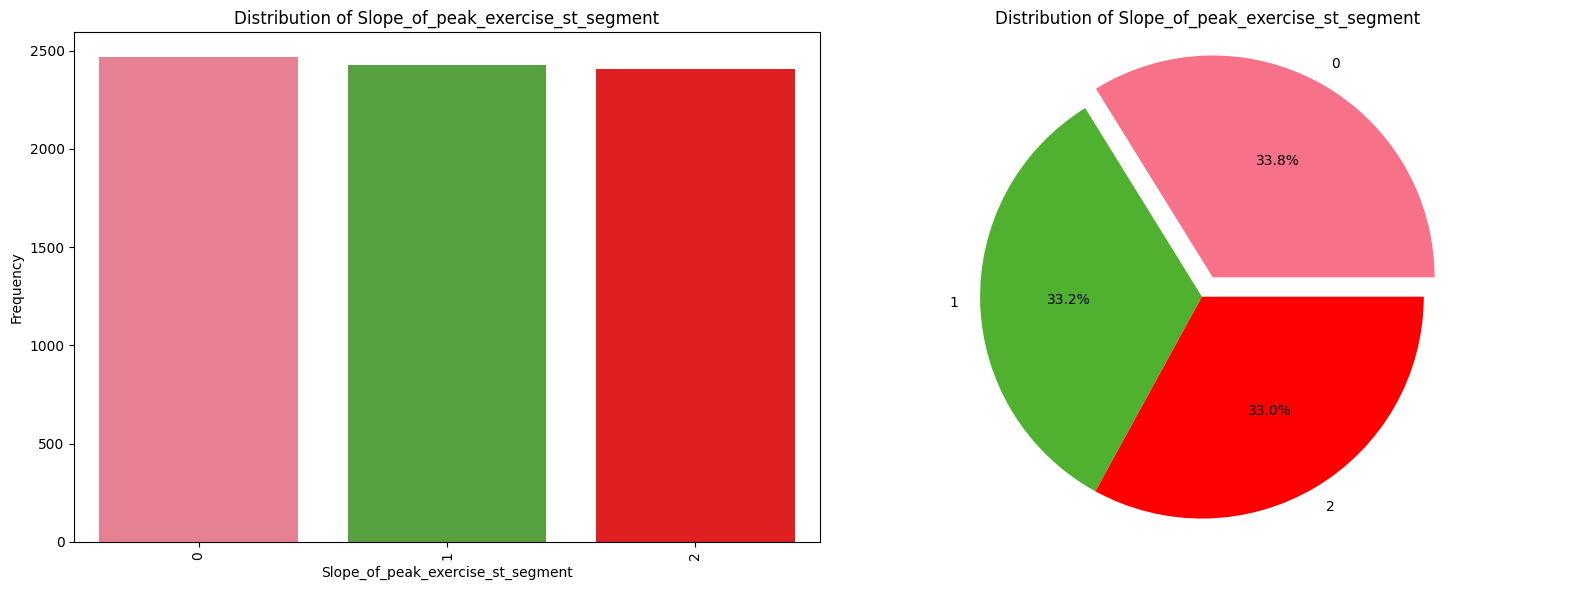

In [17]:
plot_value_counts('slope_of_peak_exercise_st_segment', train_df)

>> 33.6% has ST segment(is the portion of the electrocardiogram (ECG)) normal, 33.2% apiece are mildly abnormal and moderatly abnomal, posing real cardiovascular issue.

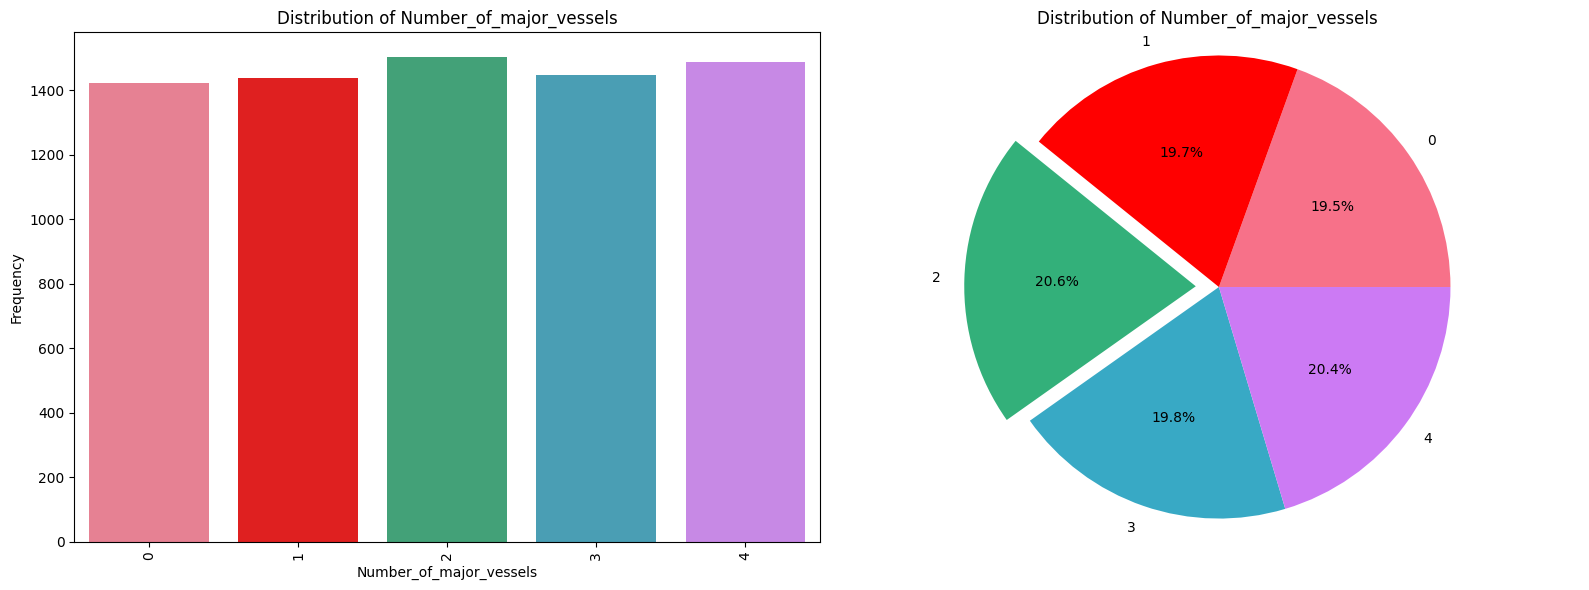

In [18]:
plot_value_counts('number_of_major_vessels', train_df)

>> 20.6% represents 4 of major coronary arteries affected by significant stenosis (narrowing or blockage) in the dataset, 19.7% has 3 affected, 20.5% has 2 affected, 20% has 1 affected and 19.3% has 0 affected. 

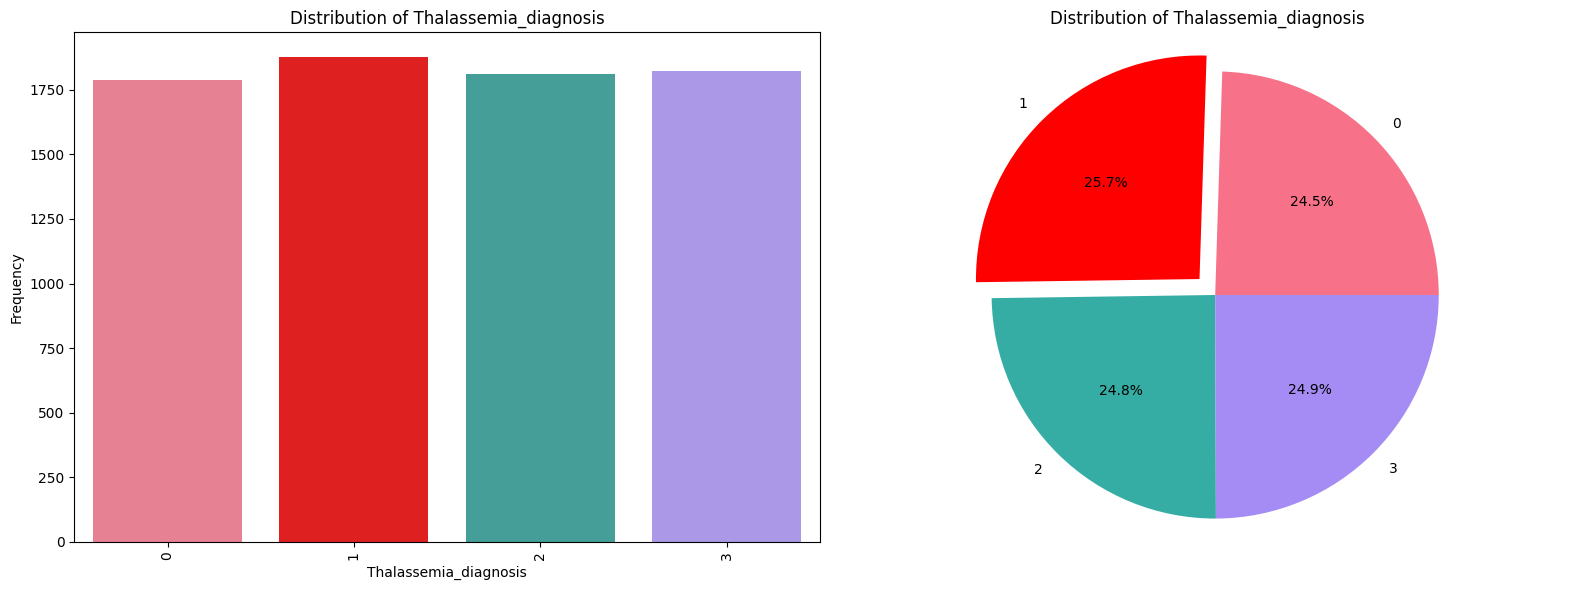

In [19]:
plot_value_counts('thalassemia_diagnosis', train_df)

>> 25.1% has absence of thalassemia/normal presence, 0 value(a genetic disorder affecting hemoglobin production)
25% apiece has 1: Thalassemia minor (mild, carrier), 2: Thalassemia intermedia (moderate) and 24.9% has 3: Thalassemia major (severe), representing and major risk of cardiovascular infection.



### Distribution of my continous variables

In [20]:
numeric_columns = ['patient_age','resting_blood_pressure', 'serum_cholesterol_level', 
                   'maximum_heart_rate_achieved', 'st_depression_induced_by_exercise']

In [21]:
def plot_numeric_distributions(df, numeric_cols):
    """
    Plot the distribution of numeric variables using seaborn.

    Args:
    - df (pd.DataFrame): DataFrame containing numeric variables.
    - numeric_cols (list): List of numeric column names.

    Returns:
    - None
    """
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(16, 6*len(numeric_cols)))

    # Iterate over numeric columns
    for i, col in enumerate(numeric_cols):
        # Plot histogram
        sns.histplot(df[col], ax=axes[i, 0], kde=True, bins=50)
        axes[i, 0].set_title(f'Histogram of {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Frequency')

        # Plot boxplot
        sns.boxplot(df[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_ylabel(col)

    # Layout so plots do not overlap
    plt.tight_layout()

    plt.show()


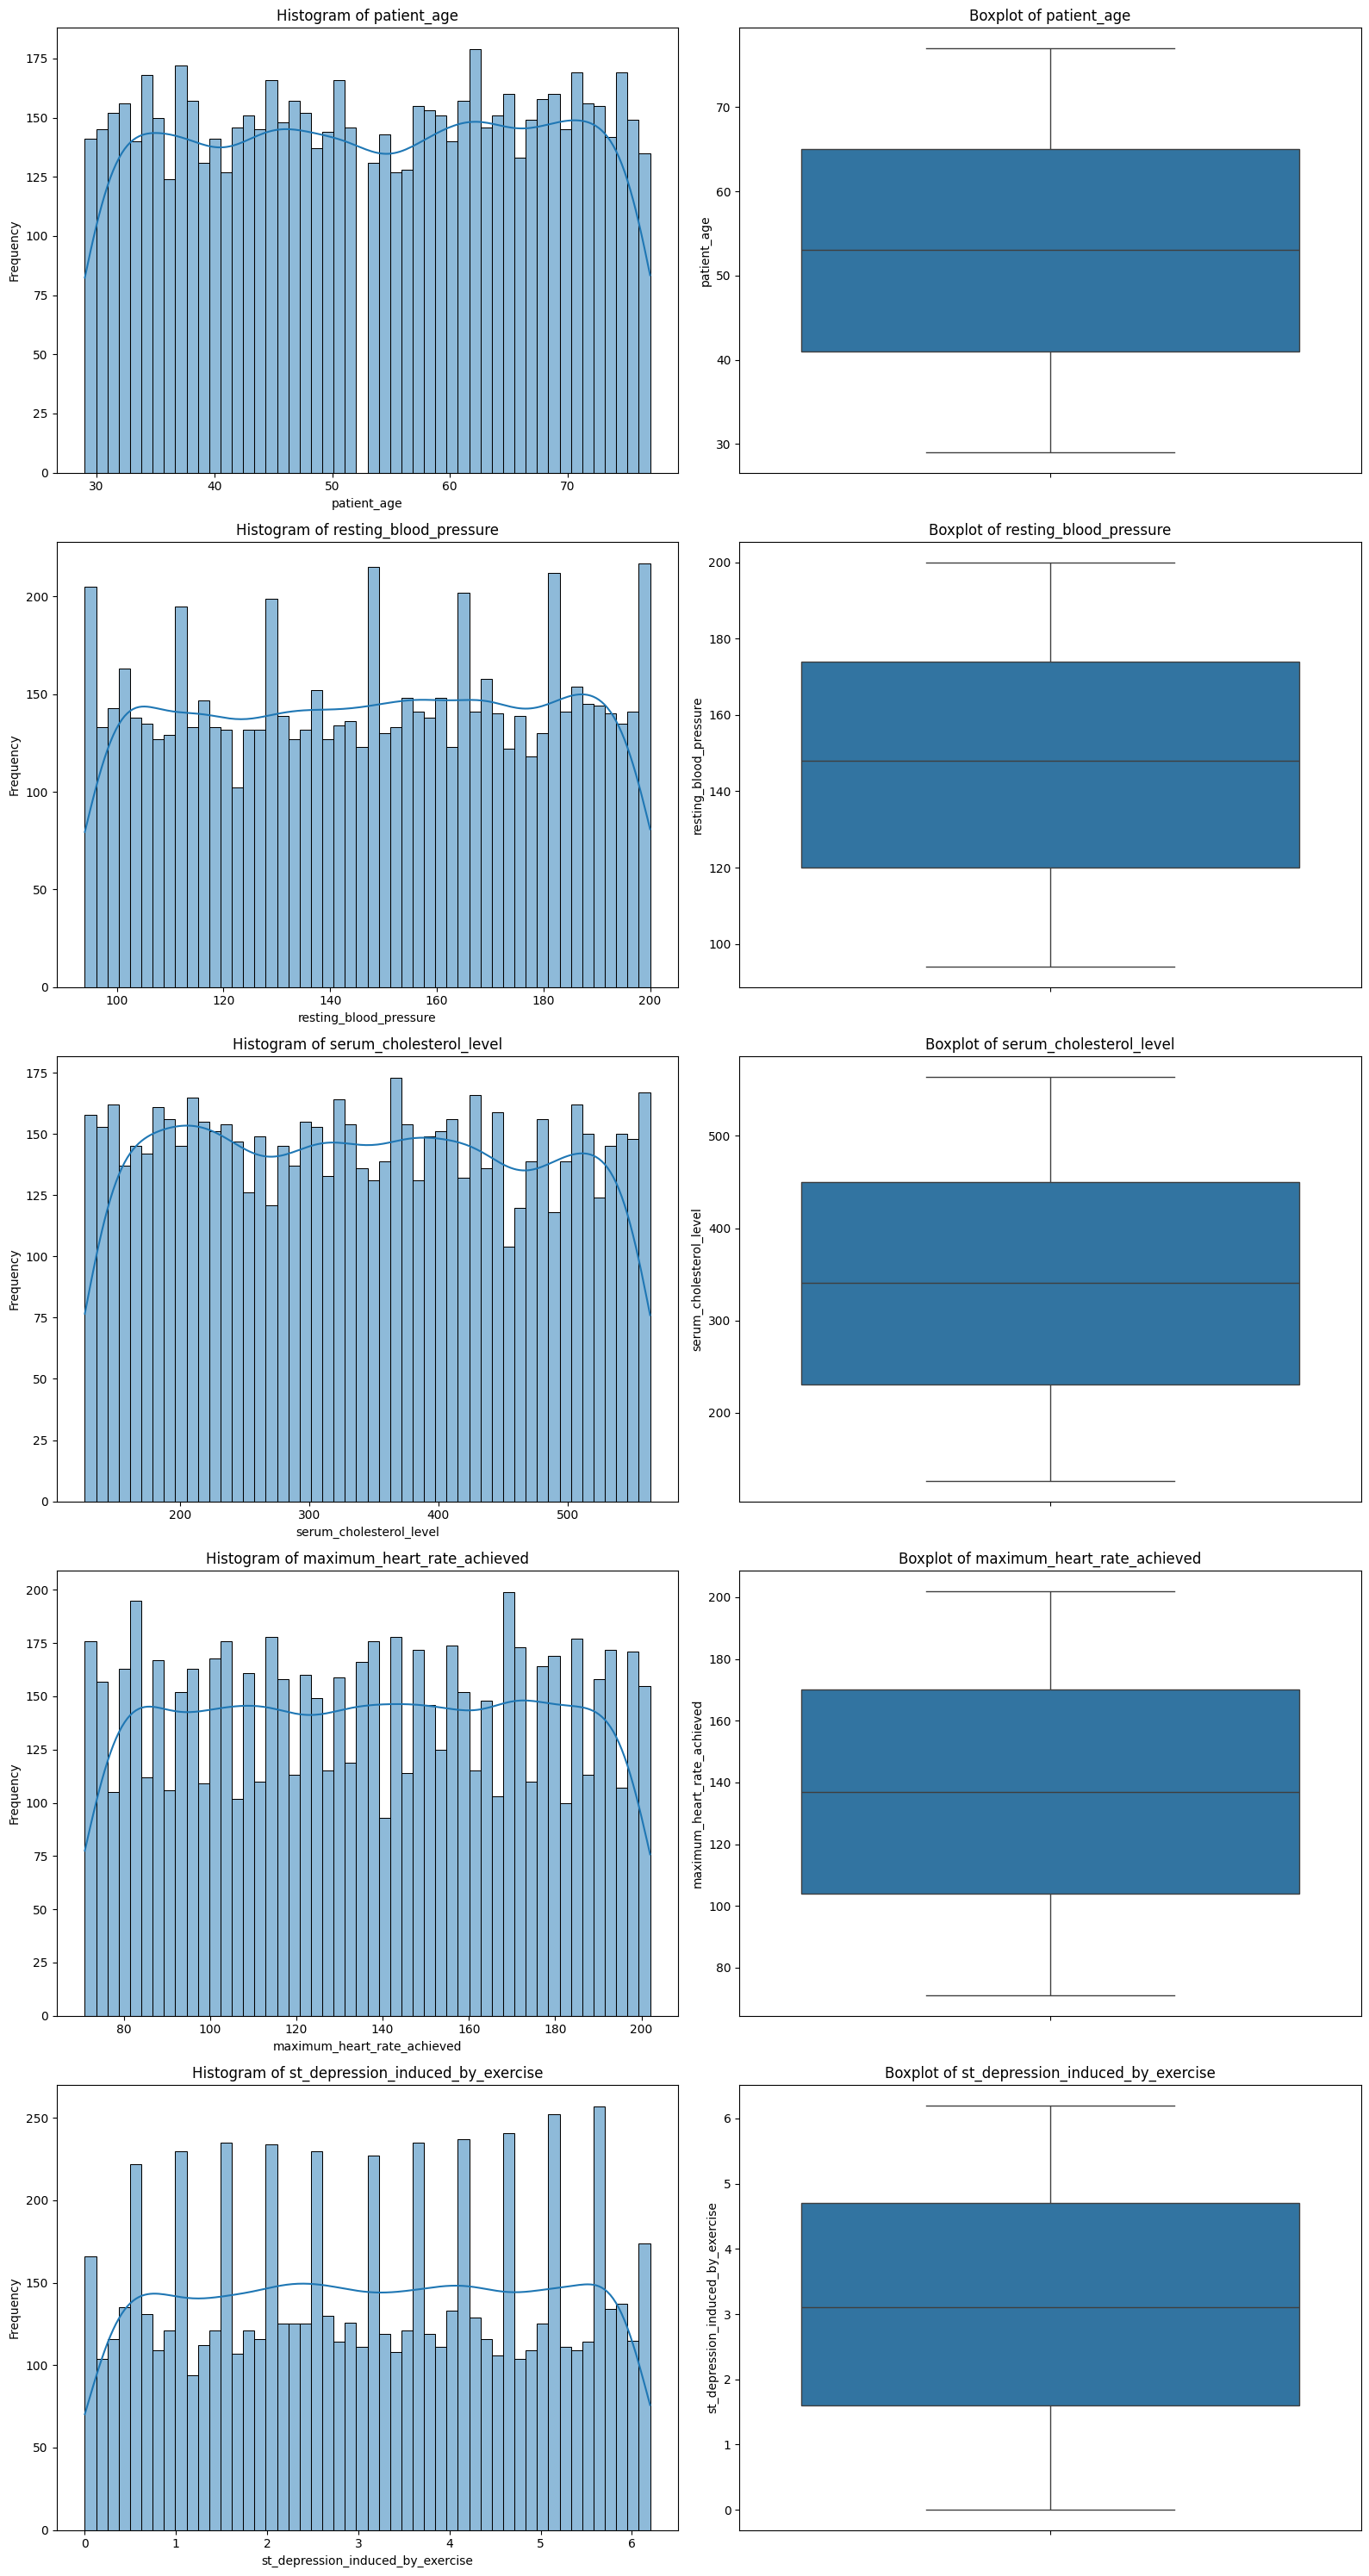

In [22]:
plot_numeric_distributions(train_df, numeric_columns)

>> Insight: The data is pretty evenly distributed with no outliers in the boxplot. Good to go!

## Join both train and test to transfrom the data uniformly

Dummy variables from specific columns

In [12]:
#join the test and trainset to ensure uniform preprocessing
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y = train_df['target']
complete_data = pd.concat((train_df, test_df)).reset_index(drop=True)
complete_data.drop(['target'], axis=1, inplace=True)
print("all_data size is : {}".format(complete_data.shape))

all_data size is : (10000, 14)


Create Dummy variables from the columns:
- slope_of_peak_exercise_st_segment, 
- Chest_pain_type, 
- resting_ecg_results, 
- number_of_major_vessels, 
- thalassema_diagnosis'

In [13]:
def create_dummies(column_name, table):
    """
    Create dummy variables using pandas' get_dummies method.

    Args:
    - column_name (str): Name of the column to create dummies for.
    - table (pd.DataFrame): DataFrame containing the column.

    Returns:
    - pd.DataFrame: DataFrame with dummy variables.
    """
    # Create dummy variables
    dummies = pd.get_dummies(table[column_name], prefix=column_name)

    return dummies

# Create dummy variables
column_names = ['slope_of_peak_exercise_st_segment', 'chest_pain_type','resting_ecg_results',
                'number_of_major_vessels', 'thalassemia_diagnosis']



# Drop the original columns
#df = df.drop(column_names, axis=1)

In [14]:
dummies1 = create_dummies('slope_of_peak_exercise_st_segment', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies1], axis=1)

dummies2 = create_dummies('chest_pain_type', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies2], axis=1)

dummies3 = create_dummies('resting_ecg_results', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies3], axis=1)

dummies4 = create_dummies('number_of_major_vessels', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies4], axis=1)

dummies5 = create_dummies('thalassemia_diagnosis', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies5], axis=1)

#complete_data['blood_pressure_cholesterol_interaction'] = complete_data['resting_blood_pressure'] * complete_data['serum_cholesterol_level']


In [15]:
complete_data.head()

patient_id  patient_age  patient_sex  chest_pain_type  \
0       16167           33            0                1   
1       11275           53            1                2   
2       13251           37            1                2   
3       19921           75            0                0   
4       11293           35            1                2   

   resting_blood_pressure  serum_cholesterol_level  \
0                     158                      205   
1                     198                      154   
2                     101                      202   
3                     113                      306   
4                     139                      419   

   fasting_blood_sugar_result  resting_ecg_results  \
0                           1                    0   
1                           0                    1   
2                           1                    0   
3                           1                    2   
4                           1                    1   

   maximum_heart_rate_achieved  exercise_induced_angina_result  ...  \
0                          154                               0  ...   
1                          104                               0  ...   
2                          155                               0  ...   
3                           88                               1  ...   
4                          166                               1  ...   

   resting_ecg_results_2  number_of_major_vessels_0  \
0                  False                      False   
1                  False                      False   
2                  False                      False   
3                   True                      False   
4                  False                      False   

   number_of_major_vessels_1  number_of_major_vessels_2  \
0                      False                      False   
1                       True                      False   
2                      False                      False   
3                      False                       True   
4                      False                      False   

   number_of_major_vessels_3  number_of_major_vessels_4  \
0                      False                       True   
1                      False                      False   
2                       True                      False   
3                      False                      False   
4                      False                       True   

   thalassemia_diagnosis_0  thalassemia_diagnosis_1  thalassemia_diagnosis_2  \
0                    False                     True                    False   
1                     True                    False                    False   
2                    False                     True                    False   
3                    False                    False                     True   
4                     True                    False                    False   

   thalassemia_diagnosis_3  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 33 columns]

In [16]:
# Drop the original columns
complete_data = complete_data.drop(column_names, axis=1)

### Create Bins out of the colums
- Age(numeric): min; 29, max; 77
- resting_blood_pressure(numeric): min(94), max(200)
- serum_cholesterol_level(numeric):min(126), max(564)
- maximum_heart_rate_achieved(numeric): min(71), max(202)
- st_depression_induced_by_exercise(numeric): min(0), max(6.2)


In [17]:
#1. age_group: Bin age into 3 categories: young (29-44), middle (45-60), old (61-77)

complete_data['age_group'] = pd.cut(complete_data['patient_age'], 
                                    bins=[29, 44, 60, 77], labels=['young', 'middle', 'old'], 
                                    include_lowest=True)

#1. blood_pressure_category: Bin resting_blood_pressure into 3 categories: low (94-120), normal (121-140), high (141-200)

complete_data['blood_pressure_category'] = pd.cut(complete_data['resting_blood_pressure'], 
                                                  bins=[94, 120, 140, 200], labels=['low', 'normal', 'high'], 
                                                  include_lowest=True)

#1. cholesterol_level_category: Bin serum_cholesterol_level into 3 categories: low (126-200), normal (201-300), high (301-564)

complete_data['cholesterol_level_category'] = pd.cut(complete_data['serum_cholesterol_level'], 
                                          bins=[126, 200, 300, 564], labels=['low', 'normal', 'high'], 
                                          include_lowest=True)

#1. heart_rate_category: Bin maximum_heart_rate_achieved into 3 categories: low (71-100), normal (101-140), high (141-202)

complete_data['heart_rate_category'] = pd.cut(complete_data['maximum_heart_rate_achieved'], 
                                   bins=[71, 100, 140, 202], labels=['low', 'normal', 'high'], include_lowest=True)

#1. st_depression_category: Bin st_depression_induced_by_exercise into 3 categories: low (0-1), normal (1-2), high (2-6.2)

complete_data['st_depression_category'] = pd.cut(complete_data['st_depression_induced_by_exercise'], 
                                      bins=[0, 1, 2, 6.2], labels=['low', 'normal', 'high'], include_lowest=True)



#### Drop Binned Columns

In [18]:
Binned_columns = ['st_depression_induced_by_exercise', 'maximum_heart_rate_achieved', 
                   'serum_cholesterol_level', 'resting_blood_pressure', 'patient_age']
complete_data.drop(Binned_columns, axis=1,inplace= True)

In [19]:
complete_data.head()

patient_id  patient_sex  fasting_blood_sugar_result  \
0       16167            0                           1   
1       11275            1                           0   
2       13251            1                           1   
3       19921            0                           1   
4       11293            1                           1   

   exercise_induced_angina_result  slope_of_peak_exercise_st_segment_0  \
0                               0                                False   
1                               0                                False   
2                               0                                False   
3                               1                                 True   
4                               1                                False   

   slope_of_peak_exercise_st_segment_1  slope_of_peak_exercise_st_segment_2  \
0                                 True                                False   
1                                False                                 True   
2                                 True                                False   
3                                False                                False   
4                                False                                 True   

   chest_pain_type_0  chest_pain_type_1  chest_pain_type_2  ...  \
0              False               True              False  ...   
1              False              False               True  ...   
2              False              False               True  ...   
3               True              False              False  ...   
4              False              False               True  ...   

   number_of_major_vessels_4  thalassemia_diagnosis_0  \
0                       True                    False   
1                      False                     True   
2                      False                    False   
3                      False                    False   
4                       True                     True   

   thalassemia_diagnosis_1  thalassemia_diagnosis_2  thalassemia_diagnosis_3  \
0                     True                    False                    False   
1                    False                    False                    False   
2                     True                    False                    False   
3                    False                     True                    False   
4                    False                    False                    False   

   age_group  blood_pressure_category  cholesterol_level_category  \
0      young                     high                      normal   
1     middle                     high                         low   
2      young                      low                      normal   
3        old                      low                        high   
4      young                   normal                        high   

   heart_rate_category  st_depression_category  
0                 high                  normal  
1               normal                     low  
2                 high                    high  
3                  low                    high  
4                 high                     low  

[5 rows x 28 columns]

In [20]:
dummies1 = create_dummies('age_group', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies1], axis=1)

dummies2 = create_dummies('blood_pressure_category', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies2], axis=1)

dummies3 = create_dummies('st_depression_category', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies3], axis=1)

dummies4 = create_dummies('cholesterol_level_category', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies4], axis=1)

dummies5 = create_dummies('heart_rate_category', complete_data)
# Concatenate dummies with original table
complete_data = pd.concat([complete_data, dummies5], axis=1)

#### Drop Category columns

In [21]:
cat_columns = ['age_group', 'blood_pressure_category', 'st_depression_category', 
               'cholesterol_level_category', 'heart_rate_category', 'patient_sex']
complete_data.drop(cat_columns, axis=1, inplace= True)

In [22]:
complete_data.head()

patient_id  fasting_blood_sugar_result  exercise_induced_angina_result  \
0       16167                           1                               0   
1       11275                           0                               0   
2       13251                           1                               0   
3       19921                           1                               1   
4       11293                           1                               1   

   slope_of_peak_exercise_st_segment_0  slope_of_peak_exercise_st_segment_1  \
0                                False                                 True   
1                                False                                False   
2                                False                                 True   
3                                 True                                False   
4                                False                                False   

   slope_of_peak_exercise_st_segment_2  chest_pain_type_0  chest_pain_type_1  \
0                                False              False               True   
1                                 True              False              False   
2                                False              False              False   
3                                False               True              False   
4                                 True              False              False   

   chest_pain_type_2  chest_pain_type_3  ...  blood_pressure_category_high  \
0              False              False  ...                          True   
1               True              False  ...                          True   
2               True              False  ...                         False   
3              False              False  ...                         False   
4               True              False  ...                         False   

   st_depression_category_low  st_depression_category_normal  \
0                       False                           True   
1                        True                          False   
2                       False                          False   
3                       False                          False   
4                        True                          False   

   st_depression_category_high  cholesterol_level_category_low  \
0                        False                           False   
1                        False                            True   
2                         True                           False   
3                         True                           False   
4                        False                           False   

   cholesterol_level_category_normal  cholesterol_level_category_high  \
0                               True                            False   
1                              False                            False   
2                               True                            False   
3                              False                             True   
4                              False                             True   

   heart_rate_category_low  heart_rate_category_normal  \
0                    False                       False   
1                    False                        True   
2                    False                       False   
3                     True                       False   
4                    False                       False   

   heart_rate_category_high  
0                      True  
1                     False  
2                      True  
3                     False  
4                      True  

[5 rows x 37 columns]

### Separate Train and Test Data after Data Wrangling

In [26]:
# train_data = complete_data[:ntrain]
# test_data = complete_data[ntrain:]
# train_data.to_csv('clean_train.csv')
# test_data.to_csv('clean_test.csv')
train_df[['target']].to_csv('target.csv')
# print(y1)
# print(y)

### Lets Go Modeling
##### Lets try different methods of predicting imbalance data sets, to help with doing the job 

In [25]:
#method to evaluate and train randomforest
def build_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):
    rs=123
    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = best_params['bootstrap'],
                                   # Max depth of each tree
                                   max_depth = best_params['max_depth'],
                                   # Class weight parameters
                                   class_weight=best_params['class_weight'],
                                   # Number of trees
                                   n_estimators=best_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=best_params['min_samples_split'])
    # Train the model   
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

In [26]:
# Method to evaluate
rs = 123
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

In [27]:
# Method to resample original dataset
def resample(X_train, y_train):
    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = 123)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=123)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    return X_smo, y_smo, X_under, y_under

In [28]:
#Method to visualise metrics
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    smote = df.iloc[2, 1:].values
    under = df.iloc[3, 1:].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.bar(x+0.4, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "SMOTE", "Undersampling"])
    plt.show()

In [29]:
# Tuned random forest parameters
best_params_no_weight = {'bootstrap': True,
                         'class_weight': None, 
                         'max_depth': 10, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

In [30]:
def split_data(df, target):
    return train_test_split(df, target, test_size=0.25, stratify=y, random_state = 123)

# Split the training and testing dataset
x_train, x_test, y_train, y_test = split_data(train_data.drop(['patient_id'], axis=1), y)
# Split the training and testing dataset
X_train, X_test, Y_train, Y_test = split_data(train_df.drop(['patient_id', 'target'], axis=1), y)

### Create a list to compare and assemble all metrics in one place

In [31]:
results = []

preds, model = build_rf(x_train, y_train, x_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds, "Original")
print(result)
results.append(result)

{'type': 'Original', 'accuracy': 0.8148959474260679, 'recall': 0.9636363636363636, 'auc': 0.5653958944281525, 'precision': 0.8344023323615161, 'fscore': 0.9579299691040163}


#### Lets test class weight

In [32]:
class_weight = {}
# 0.2 to 0 class
class_weight[0] = 0.8
# 0.8 to 1 class
class_weight[1] = 0.2

# Pre-tuned hyper parameters
best_params_weight = {'bootstrap': True,
                         'class_weight': class_weight, 
                         'max_depth': 15, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

# class weight
preds_cw, weight_model = build_rf(x_train, y_train, x_test, best_params=best_params_weight)

result = evaluate(y_test, preds_cw, "Class Weight")
print(result)
results.append(result)

{'type': 'Class Weight', 'accuracy': 0.8253012048192772, 'recall': 0.8538720538720539, 'auc': 0.7773759096339742, 'precision': 0.9255474452554745, 'fscore': 0.8564229120665022}


### Lets TRY SMOTE oversampling

In [33]:
X_smo, y_smo, X_under, y_under = resample(x_train, y_train)

In [34]:
#### Train with Oversampled SMOTE
preds_smo, smo_model = build_rf(X_smo, y_smo, x_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_smo, "SMOTE")
print(result)
results.append(result)

{'type': 'SMOTE', 'accuracy': 0.8225629791894852, 'recall': 0.7966329966329966, 'auc': 0.8660584338003694, 'precision': 0.9817427385892116, 'fscore': 0.8024523871641012}


#### Try SMOTE undersampling

In [35]:
preds_under, under_model = build_rf(X_under, y_under, x_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_under, "Undersampling")
print(result)
results.append(result)

{'type': 'Undersampling', 'accuracy': 0.8220153340635268, 'recall': 0.7831649831649832, 'auc': 0.8871836646030195, 'precision': 0.9974271012006861, 'fscore': 0.7896894831683685}


#### Compare the performance among different random forest models
By now, we have built four different random forest models: the model trained with the original dataset, the model with class weights, the model trained with SMOTE dataset, and the model trained with undersampling.

To better analyze and compare their performance, we can visualize the metrics using a grouped bar chart.

            type  accuracy    recall       auc  precision    fscore
0       Original  0.814896  0.963636  0.565396   0.834402  0.957930
1   Class Weight  0.825301  0.853872  0.777376   0.925547  0.856423
2          SMOTE  0.822563  0.796633  0.866058   0.981743  0.802452
3  Undersampling  0.822015  0.783165  0.887184   0.997427  0.789689


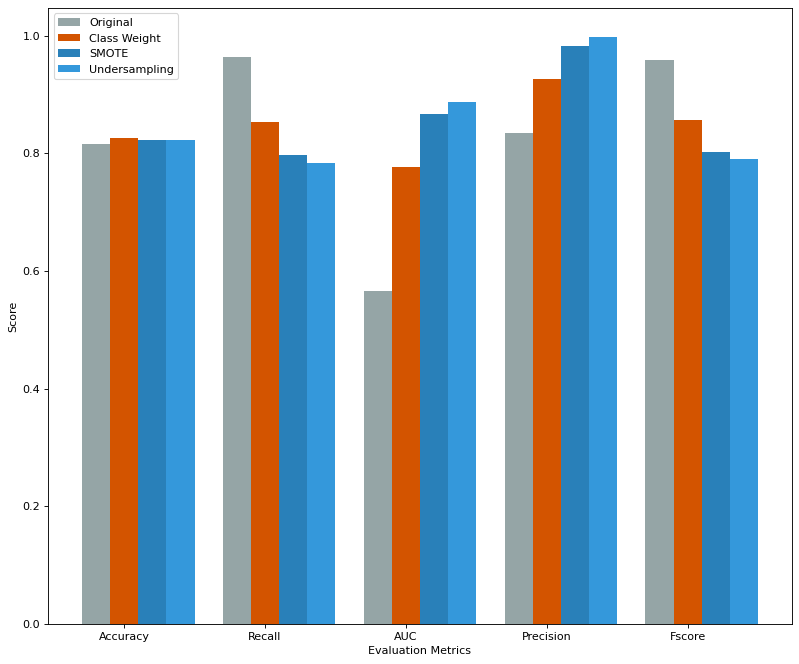

In [36]:
visualize_eval_metrics(results)

Lets try xgboost

In [37]:
# def grid_search_xgb(X_train, y_train):
#     # Define the parameter grid for XGBoost
#     params_grid = {
#         'max_depth': [15, 20, 25],
#         'n_estimators': [100,50],
#         'scale_pos_weight': [5, 8, 10],
#         'learning_rate': [0.1, 0.5],
#         'gamma': [0.1, 0.3],
#         'subsample': [0.5, 0.8],
#         'colsample_bytree': [0.5, 0.8],
#         #'reg_alpha': [0.1, 0.3],
#         #reg_lambda': [0.1, 0.3]
#     }
    
#     # Initialize the XGBClassifier model
#     xgb_model = XGBClassifier(random_state=123)
    
#     # Perform GridSearchCV with 2-fold cross-validation
#     grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='f1', cv=4, verbose=1)
    
#     # Fit the grid search to the data
#     grid_search.fit(X_train, y_train)
    
#     # Return the best parameters
#     return grid_search.best_params_

# # Perform grid search to find the best parameters
# best_params = grid_search_xgb(X_smo, y_smo)

In [38]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

def grid_search_catboost(X_train, y_train):
    # Define the parameter grid for CatBoost
    params_grid = {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.1, 0.5],
        'l2_leaf_reg': [0.1, 0.5, 1],
        # 'iterations': [100, 500, 1000],
        # 'random_seed': [42, 123],
        # 'od_type': ['Iter', 'IncToDec'],
        # 'od_wait': [50, 100],
        # 'border_count': [32, 64],
    }

    # Initialize the CatBoostClassifier model
    cb_model = CatBoostClassifier()

    # Perform GridSearchCV with 4-fold cross-validation
    grid_search = GridSearchCV(estimator=cb_model, param_grid=params_grid, scoring='f1', cv=2, verbose=1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    # Return the best parameters
    return grid_search.best_params_

# Perform grid search to find the best parameters
best_params = grid_search_catboost(x_train, y_train)

# Train a CatBoostClassifier model with the best parameters
cb_model_best = CatBoostClassifier(**best_params)
cat_model = cb_model_best.fit(x_train, y_train)


Fitting 2 folds for each of 27 candidates, totalling 54 fits
0:	learn: 0.6697777	total: 144ms	remaining: 2m 23s
1:	learn: 0.6459025	total: 151ms	remaining: 1m 15s
2:	learn: 0.6246146	total: 155ms	remaining: 51.7s
3:	learn: 0.6048730	total: 159ms	remaining: 39.7s
4:	learn: 0.5854899	total: 165ms	remaining: 32.9s
5:	learn: 0.5658112	total: 169ms	remaining: 28.1s
6:	learn: 0.5448736	total: 172ms	remaining: 24.4s
7:	learn: 0.5276046	total: 176ms	remaining: 21.8s
8:	learn: 0.5125339	total: 183ms	remaining: 20.1s
9:	learn: 0.4965703	total: 186ms	remaining: 18.4s
10:	learn: 0.4826306	total: 192ms	remaining: 17.2s
11:	learn: 0.4700899	total: 201ms	remaining: 16.5s
12:	learn: 0.4585083	total: 205ms	remaining: 15.5s
13:	learn: 0.4470475	total: 213ms	remaining: 15s
14:	learn: 0.4362675	total: 218ms	remaining: 14.3s
15:	learn: 0.4261996	total: 222ms	remaining: 13.6s
16:	learn: 0.4167411	total: 225ms	remaining: 13s
17:	learn: 0.4081074	total: 233ms	remaining: 12.7s
18:	learn: 0.3983585	total: 236ms

In [39]:
#best_params
pred_cat = cat_model.predict(x_test)
evaluate(y_test, pred_cat, "CatBoost")

{'type': 'CatBoost',
 'accuracy': 0.8220153340635268,
 'recall': 0.9185185185185185,
 'auc': 0.6601390246551537,
 'precision': 0.8698979591836735,
 'fscore': 0.9165482128550385}

In [40]:
submit = cat_model.predict(test_data.drop(['patient_id'], axis=1))

# Create submission DataFrame and save to CSV
submit_df = pd.DataFrame({'id': test_data['patient_id'], 'target': submit})
submit_df.to_csv('submit16.csv', index=False)

In [284]:
params = {'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 20,
 'n_estimators': 50,
 'scale_pos_weight': 10,
 'subsample': 0.8}

In [294]:
def train_xgb(X_train, y_train):
    # Initialize the XGBClassifier model with the best parameters
    xgb_model = XGBClassifier(eval_metric='auc',**params, random_state=123)
    
    # Fit the model to the data
    xgb_model.fit(X_train, y_train)
    
    return xgb_model

# Train the XGBClassifier model with the best parameters
xgb_model = train_xgb(x_train, y_train)

Confusion Matrix - XGBoost:
 [[ 154  187]
 [ 152 1333]]


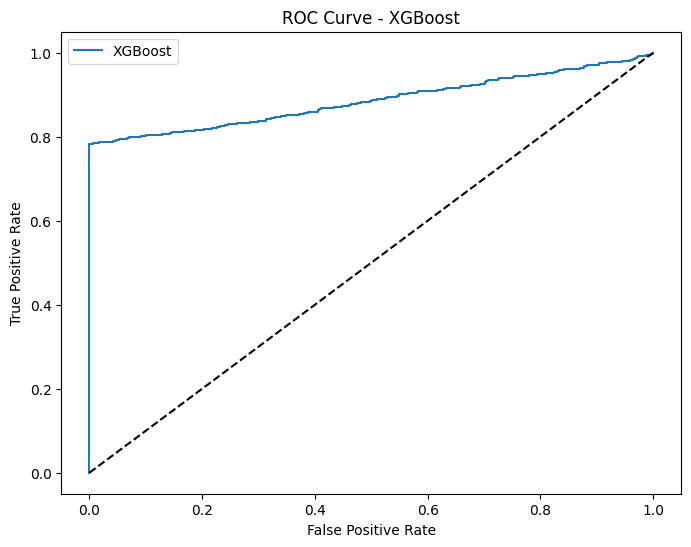

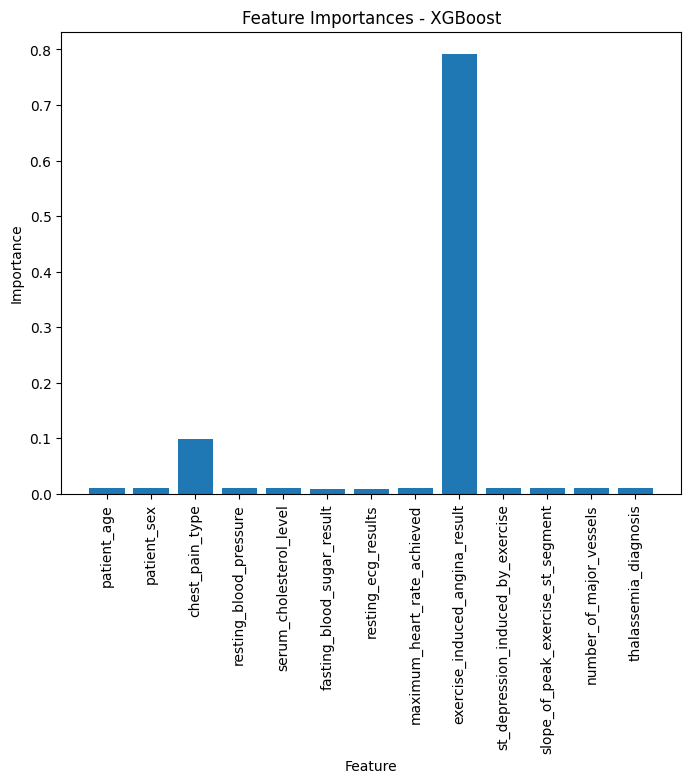

Metrics - XGBoost:
F1 Score: 0.8871880199667221
Recall: 0.8976430976430977
Precision: 0.8769736842105263
Accuracy: 0.8143483023001096


In [296]:
# Make predictions on the test set
preds = xgb_model.predict(x_test)
probs = xgb_model.predict_proba(x_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, preds)
print('Confusion Matrix - XGBoost:\n', cm)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

feature_importances = xgb_model.feature_importances_
feature_names = x_train.columns
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances)
plt.title('Feature Importances - XGBoost')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
print('Metrics - XGBoost:')
print('F1 Score:', f1)
print('Recall:', recall)
print('Precision:', precision)
print('Accuracy:', accuracy)

In [297]:
submit = xgb_model.predict(test_data.drop(['patient_id'], axis=1))

# Create submission DataFrame and save to CSV
submit_df = pd.DataFrame({'id': test_data['patient_id'], 'target': submit})
submit_df.to_csv('submit14.csv', index=False)

### Try stacking models
- XGBOOST
- CATBOOST
- LIGHTGBM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

# Define hyperparameter tuning space for each model
xgb_params = {'max_depth': [3, 5], 'learning_rate': [0.1, 0.5], 'scale_pos_weight': [5, 10]}
catboost_params = {'depth': [6, 8], 'learning_rate': [0.1, 0.5], 'scale_pos_weight': [5, 10]}
lgb_params = {'max_depth': [3, 5], 'learning_rate': [0.1, 0.5], 'is_unbalance': [True]}

# Define models
xgb_model = xgb.XGBClassifier(random_state=42)
catboost_model = CatBoostClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Perform grid search for hyperparameter tuning
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=4, scoring='f1')
catboost_grid = GridSearchCV(catboost_model, catboost_params, cv=4, scoring='f1')
#lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=4, scoring='f1')

xgb_grid.fit(X_train, y_train)
catboost_grid.fit(X_train, y_train)
#lgb_grid.fit(X_train, y_train)

# Get best-performing models
best_xgb = xgb_grid.best_estimator_
best_catboost = catboost_grid.best_estimator_
#best_lgb = lgb_grid.best_estimator_
# Make predictions using best-performing models
y_pred_xgb = best_xgb.predict(X_test)
y_pred_catboost = best_catboost.predict(X_test)
#y_pred_lgb = best_lgb.predict(X_test)

# Define voting classifier
voting_clf = VotingClassifier(estimators=[
    ('xgb', best_xgb), ('catboost', best_catboost),
], voting='hard')

# Fit voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions using voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate models
print("XGBoost:")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_xgb)}")
print(f"F1 score: {f1_score(y_test, y_pred_xgb)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")

print("\nCatBoost:")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_catboost)}")
print(f"F1 score: {f1_score(y_test, y_pred_catboost)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_catboost)}")
print(f"Precision: {precision_score(y_test, y_pred_catboost)}")

# print("\nLightGBM:")
# print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_lgb)}")
# print(f"F1 score: {f1_score(y_test, y_pred_lgb)}")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb)}")
# print(f"Precision: {precision_score(y_test, y_pred_lgb)}")

print("\nVoting Classifier:")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_voting)}")
print(f"F1 score: {f1_score(y_test, y_pred_voting)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(f"Precision: {precision_score(y_test, y_pred_voting)}")

#predict on test data and save
submit = voting_clf.predict(test.drop(['patient_id'], axis=1))

# Create submission DataFrame and save to CSV
submit_df = pd.DataFrame({'id': test['patient_id'], 'target': submit})
submit_df.to_csv('submitmulticlassifers.csv', index=False)